# Центральная предельная теорема своими руками.
## "Знакомство" с используемым распределением
Импортируем необходимые библиотеки

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

Сгенерируем выборку объёма 1000 из Half-normal distribution, построенного на основе нормального распределения с параметрами математического ожидания $\mu = 0$ и дисперсией $\sigma^2 = 1$. Информацию по распределению можно найти здесь - https://en.wikipedia.org/wiki/Half-normal_distribution

In [2]:
mu = 0 #математическое ожидание нормального распределения
sigma = 1 #дисперсия
n = 1000 # количество наблюдений в выборке
norm_rv = sts.norm(mu, sigma) 
sample = abs(norm_rv.rvs(n)) #выборка iid случайных величин 

Сравним эмпирическую функцию распределения для полученной выборки с теоретической:

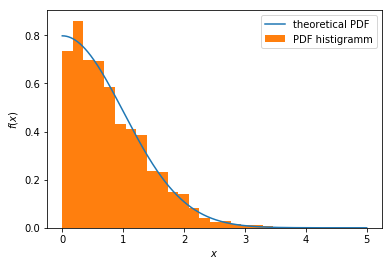

In [4]:
x = np.linspace(0,5,1000)
pdf = 2 * norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')
plt.hist(sample, bins=20, density=True, label='PDF histigramm')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')

Pdf почти совпадают.

Найдем теоретическое значения математического ожидания и дисперсии распределения: $$ E(x) = \frac{\sigma \sqrt{2}}{\sqrt{\pi}} = \frac{\sqrt{2}}{\sqrt{\pi}}  \sim 0.7979, $$
$$ D(x) =\sigma^2 (1 - \frac{2}{\pi}) = (1 - \frac{2}{\pi}) \sim 0.3634 $$

По ЦПТ $\bar{x} \rightarrow N(E(x),\frac{D(x)}{n})$, следовательно, в данном примере $\bar{x} \rightarrow N(0.7979,\frac{0.3634}{n})^{*}$. Чем больше выборка, с помощью которой оценивается выборочное среднее, тем точнее получаемое значение = тем меньше интервал в окрестности истинного значения матаматического ожидания, в который может попасть оценка $\bar{x}$ с фиксированной вероятностью.

$*$ Выкладки с подстановкой каждого возможного значения $n$ опущены, конечный ответ для используемых значений будет отображен отдельно на соответсвующем графике.


## Задание
Сохраняя заданные параметры $\mu$ и $\sigma^2$ сгенерируем по несколько выборок (1000) разной длины $n$ ($n = 5, 10, 50$), далее на основе каждого множества получим оценку выборочного среднего для рассматриваемого распределения. Для простоты создадим функцию, которая: 
* генерирует нужное число выборок заданной длины $n$
* счатает для каждой выборки значение выборочного среднего 
* строит гистограмму распределения выборочных средних
* рассчитывает параметры нормального распределения по CLT и строит теоретическое распределение поверх гистограммы
* параметры нормального распределения указываются в легенде 

In [58]:
def plot_sample_mean_dist(n, n_samples, mu, sigma):
    sample = [abs(sts.norm(mu, sigma).rvs(n)) for i in xrange(n_samples)]
    sample_mean = [np.mean(sample[i]) for i in xrange(n_samples)]
    sample_variance = [np.var(sample[i]) for i in xrange(n_samples)]

    x = np.linspace(0,5,n_samples)
    mean_clt = np.sqrt(2 / math.pi)
    variance_clt = (1 - 2 / math.pi)/n
    pdf = sts.norm(mean_clt, np.sqrt(variance_clt)).pdf(x) 
    plt.plot(x, pdf, label='theoretical PDF from CLT: N(%.4f,%.4f)' % (mean_clt, variance_clt))

    plt.hist(sample_mean, normed = True, label='sample mean histigramm, n=%d'%n)
    plt.ylabel('fraction of samples')
    plt.xlabel('$x_{mean}$')

    plt.legend(loc='upper right')
    return plt

Приступаем к анализу выборок разной длины:
### n = 5

<module 'matplotlib.pyplot' from 'C:\Users\annaa\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

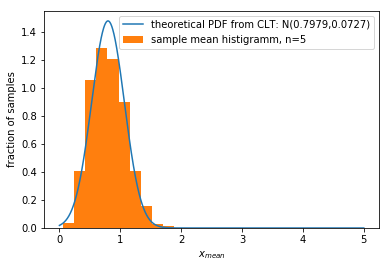

In [59]:
plot_sample_mean_dist(5, n_samples, mu, sigma)

### n = 10

<module 'matplotlib.pyplot' from 'C:\Users\annaa\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

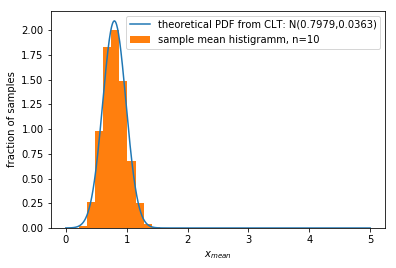

In [60]:
plot_sample_mean_dist(10, n_samples, mu, sigma)

### n = 50

<module 'matplotlib.pyplot' from 'C:\Users\annaa\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

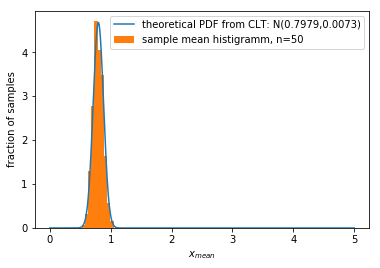

In [61]:
plot_sample_mean_dist(50, n_samples, mu, sigma)

## Результаты
* С увеличением длины выборки концентрация значений выборочных средних вокруг теоретического среднего увеличивается
* Все гистограммы хорошо описываются теоретическими распределениями, полученными из CLT
* Первый вывод соотносится с тем, что дисперсия снижается с увеличением выборки, следовательно, точность оценки растет